In [2]:
# Load pyspark, pandas
from pyspark import SparkConf, SparkContext
import pandas as pd
# 

In [3]:
# Configure Spark
conf = SparkConf().setMaster("local").setAppName("uber-date-trips")
sc = SparkContext(conf=conf)

In [4]:
# Dataset sample
filename = "fhvhv_tripdata_2020-03_short.csv"


In [6]:
# Data parsing
lines = sc.textFile("./data/" + filename)   # .csv -> RDD object

header = lines.first()
filtered_lines = lines.filter(lambda row:row != header) # all lines excepting the header

In [7]:
"""
    Run the Spark job
    - map(): apply the transformation on every element of RDD -> new RDD
    - countByValue(): action that returns the count of each unique value
    - x.split(", ")[2]: extract the value of pickup_datetime from a row
    e.g., 2020-03-01 00:03:40
    - .split(" ")[0]: extract the date from the pickup_datetime
    e.g., 2020-03-01
"""

dates = filtered_lines.map(lambda x: x.split(",")[0])

result = dates.countByValue()

In [32]:
# Save results as a csv file
pd.Series(result, name="trips", index=["HV0003","HV0004","HV0005"]).to_csv("./data/trips_date.csv")

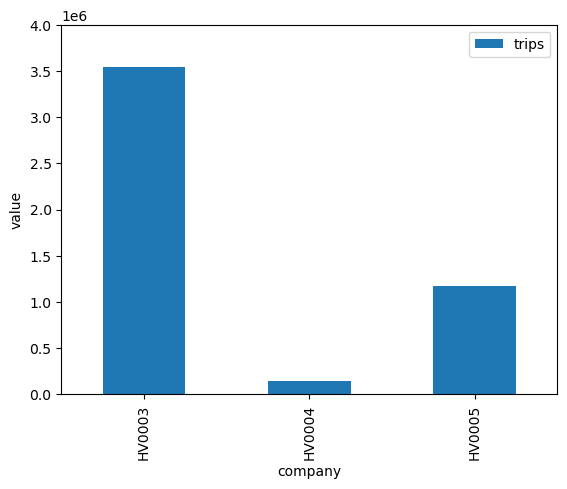

In [33]:
# Visualize the results
import matplotlib.pyplot as plt

trips = pd.read_csv("./data/trips_date.csv",index_col=0)
x = trips.plot(xlabel='company', ylabel='value', kind="bar")
plt.ylim(0, 4000000)
plt.show()
